In [44]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sn

In [45]:
# function to get the last 3 digits of the file number in one directory and get the filename of the corresponding file in another directory
def get_file_name(fns1, fns2):
    out_arr = []
    for f in fns1:
        file_num = f[-7:-4]
        
        for g in fns2:
            if file_num in g:
                num = g.split('-')[-1].split('.')[0]
                if num == "high":
                    out_arr.append(3)
                elif num == "mod":
                    out_arr.append(2)
                elif num == "low":
                    out_arr.append(1)
                break

    return out_arr

In [46]:
df = pd.read_csv('/media/jackson/backup/dp_data/powerpoints/snap_approach4.csv')
d = "/media/jackson/backup/dp_data/grading_scheme/All/*"

In [47]:
fns = df["filename"].to_numpy()

In [48]:
fns2 = glob.glob(d)

In [49]:
arr = get_file_name(fns, fns2)
df["num"] = arr

df.to_csv("/media/jackson/backup/dp_data/powerpoints/snap_approach4_new.csv", index=False)

In [50]:
df = pd.read_csv("/media/jackson/backup/dp_data/powerpoints/snap_approach4_new.csv")

In [51]:
df.keys()

Index(['filename', 'tortuosity', '#gaps', 'ground truth', 'image#', 'num'], dtype='object')

In [52]:
t = df['tortuosity'].to_numpy()
gaps = df['#gaps'].to_numpy()
gt = df['num'].to_numpy()

Text(0, 0.5, 'Number of gaps')

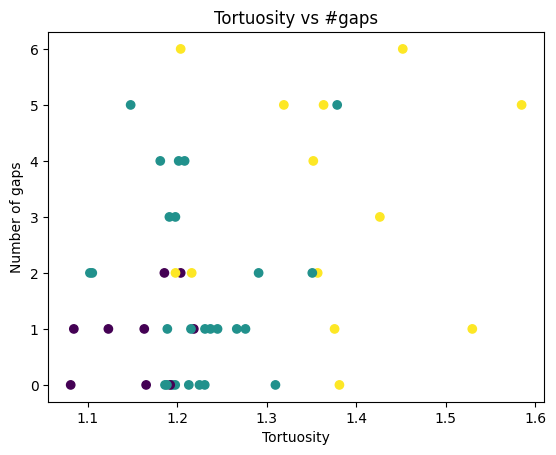

In [53]:
plt.scatter(t,gaps, c=gt)
plt.title("Tortuosity vs #gaps")
plt.xlabel("Tortuosity")
plt.ylabel("Number of gaps")

|--- tortuosity <= 1.35
|   |--- tortuosity <= 1.19
|   |   |--- truncated branch of depth 3
|   |--- tortuosity >  1.19
|   |   |--- truncated branch of depth 9
|--- tortuosity >  1.35
|   |--- #gaps <= 4.50
|   |   |--- class: 3
|   |--- #gaps >  4.50
|   |   |--- truncated branch of depth 3



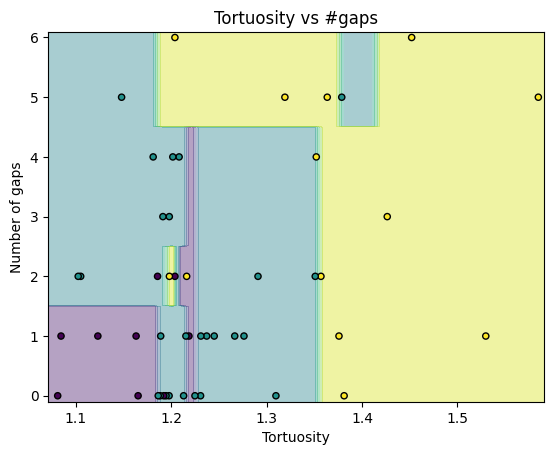

In [54]:
from sklearn import tree
import numpy as np

X = df[['tortuosity', '#gaps']].to_numpy()
y = df['num'].to_numpy()

clf = tree.DecisionTreeClassifier()
clf.fit(X,y)
print(tree.export_text(clf, feature_names=['tortuosity', '#gaps'], max_depth=1))

# plot the decision boundary of the tree
x_min, x_max = X[:, 0].min()-0.01, X[:, 0].max()+0.01
y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.title("Tortuosity vs #gaps")
plt.xlabel("Tortuosity")
plt.ylabel("Number of gaps")
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
plt.show()







In [55]:
def hand_crafted_prediction(X):
    out = []

    for point in X:
        if point[0] < 1.19 and point[1] < 3:
            out.append(1)
        elif point[0] < 1.35 and point[1] < 5:
            out.append(2)
        else:
            out.append(3)
    
    return out
    

In [56]:
preds = hand_crafted_prediction(X)

In [57]:
# add preds to a column named predictions in a csv file
df["predictions"] = preds

df.to_csv("/media/jackson/backup/dp_data/powerpoints/snap_approach4_new_with_preds.csv", index=False)

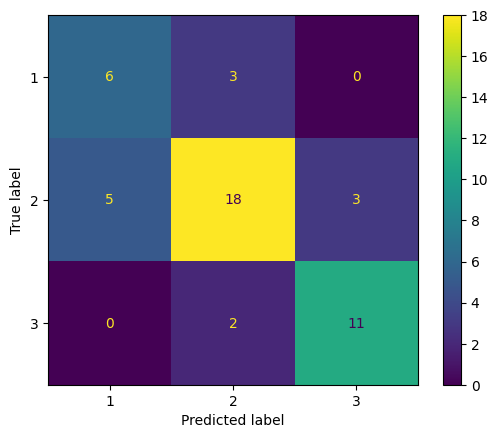

In [58]:
cm = confusion_matrix(y, preds, labels=[1,2,3])

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=[1,2,3])
disp.plot()

